In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

df = pd.read_csv("climate.csv", parse_dates = ['date'], index_col = ['date'])
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [250]:
df.dtypes

meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

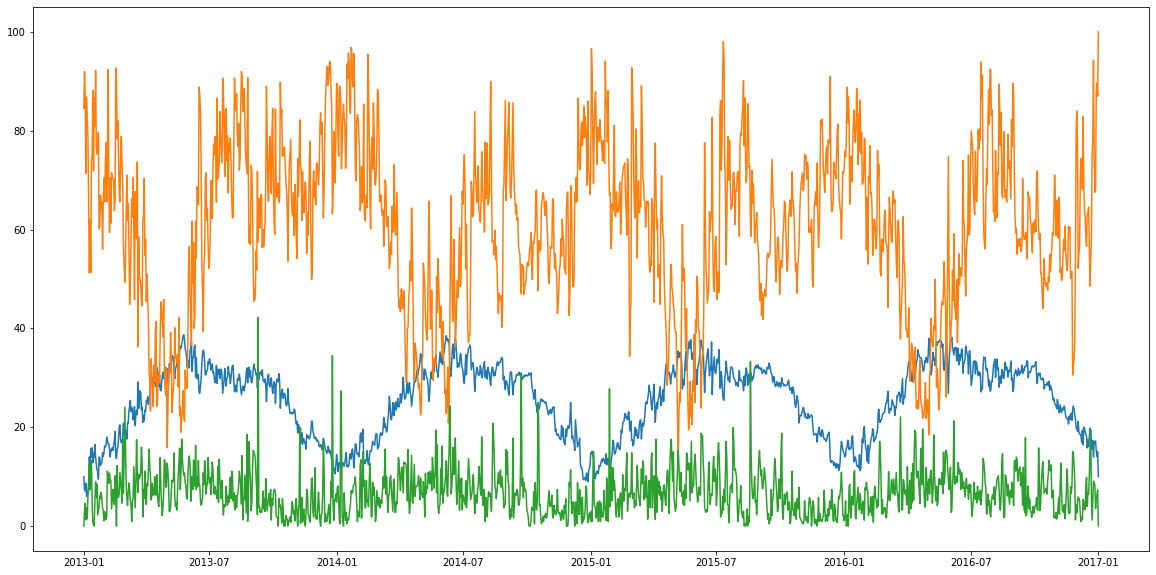

In [303]:
# df.head(500).plot(x=df.index, y='wind_speed', rot=0, figsize=(17, 7), grid=True)
plt.plot(df[["meantemp", "humidity", "wind_speed"]])
plt.rcParams["figure.figsize"] = (20,10)

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-03   8.188889  87.833333    2.537778   1017.377778
2013-01-04   7.744444  83.444444    2.948889   1017.877778
2013-01-05   7.277778  81.722222    3.188889   1017.444444
2013-01-06   7.222222  80.322222    2.137778   1017.222222
2013-01-07   6.666667  82.744444    3.826667   1018.166667
2013-01-08   7.619048  75.038095    4.974286   1018.904762
2013-01-09   9.952381  64.521429    8.647619   1018.571429
2013-01-10  11.285714  58.988095    9.014286   1017.126984
2013-01-11  13.571429  54.845238   10.157143   1016.269841
2013-01-12  13.571429  62.428571   10.400000   1015.793651


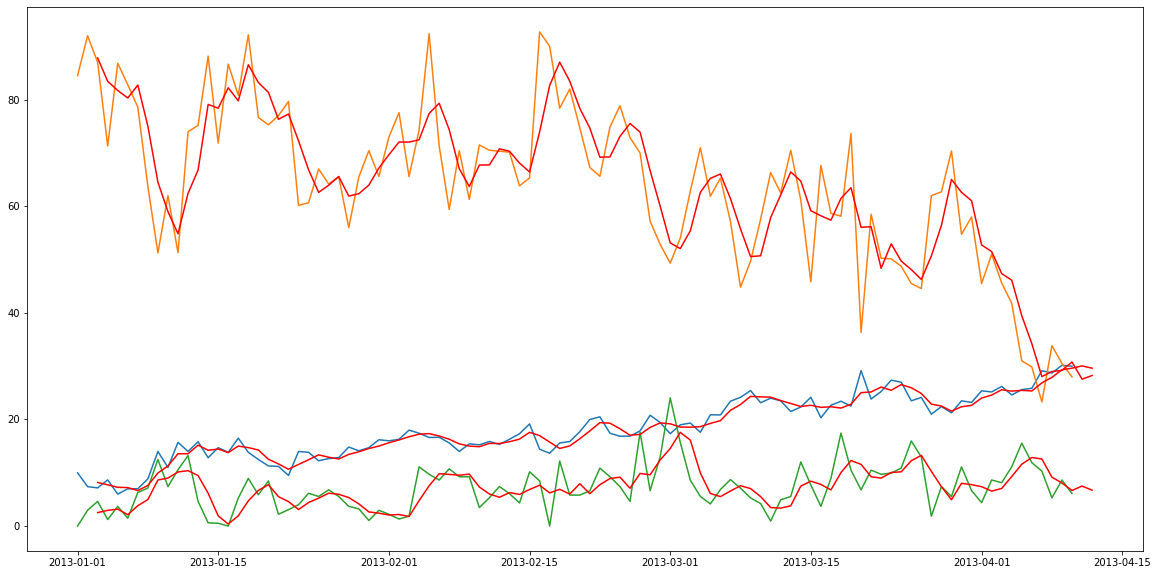

In [306]:
# Tail-rolling average transform
rolling_df = df
rolling = df.rolling(window=3)
rolling_mean = rolling.mean().replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()
print(rolling_mean.head(10))
# plot original and transformed dataset
# rolling_df.head(100).plot(figsize=(17, 7))
# rolling_mean.head(100).plot(figsize=(17, 7))

plt.plot(df.head(100)[["meantemp", "humidity", "wind_speed"]])
plt.plot(rolling_mean.head(100)[["meantemp", "humidity", "wind_speed"]], color='r')
plt.rcParams["figure.figsize"] = (20,10)

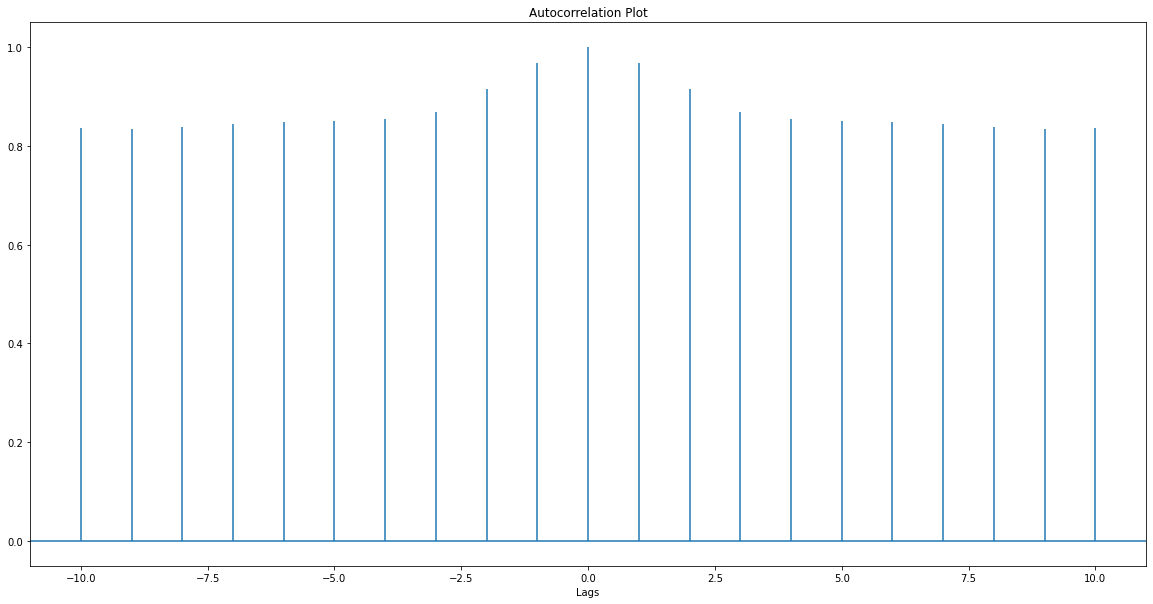

In [308]:
plt.title("Autocorrelation Plot")
plt.xlabel("Lags")
plt.acorr(rolling_mean["wind_speed"].values,)
plt.show()

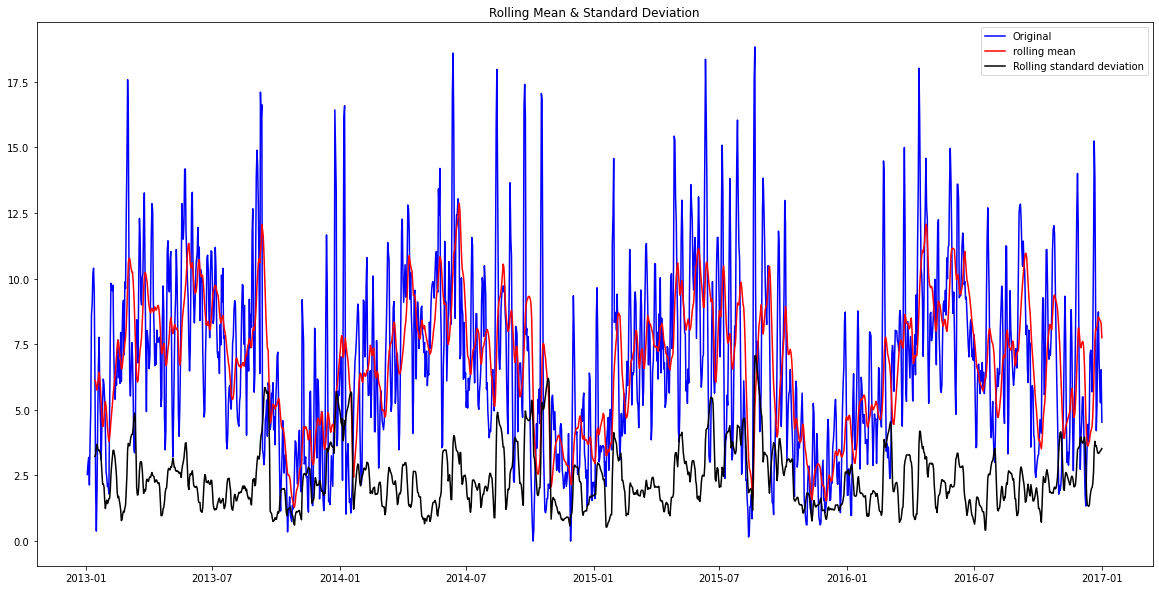

Results of Dickey-Fuller Test:
Test Statistic                   -3.762153
p-value                           0.003319
#Lags Used                       24.000000
Number of Observations Used    1435.000000
Critical value (1%)              -3.434915
Critical value (5%)              -2.863556
Critical value (10%)             -2.567843
dtype: float64


In [309]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # Здесь один год используется в качестве окна, значение каждого времени t заменяется средним значением за предыдущие 12 месяцев (включая его самого), а стандартное отклонение остается тем же.
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    #plot rolling statistics:
    fig = plt.figure()
    fig.add_subplot()
    orig = plt.plot(timeseries, color = 'blue',label='Original')
    mean = plt.plot(rolmean , color = 'red',label = 'rolling mean')
    std = plt.plot(rolstd, color = 'black', label= 'Rolling standard deviation')
    
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
    #Dickey-Fuller test:
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag = 'AIC')
    # Предыдущий элемент вывода # dftest - это значение обнаружения, значение p, количество задержек, количество использованных наблюдений и критическое значение для каждого уровня достоверности.
    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    
    print(dfoutput)
    
test_stationarity(rolling_mean["wind_speed"])

C:\Users\voshc\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


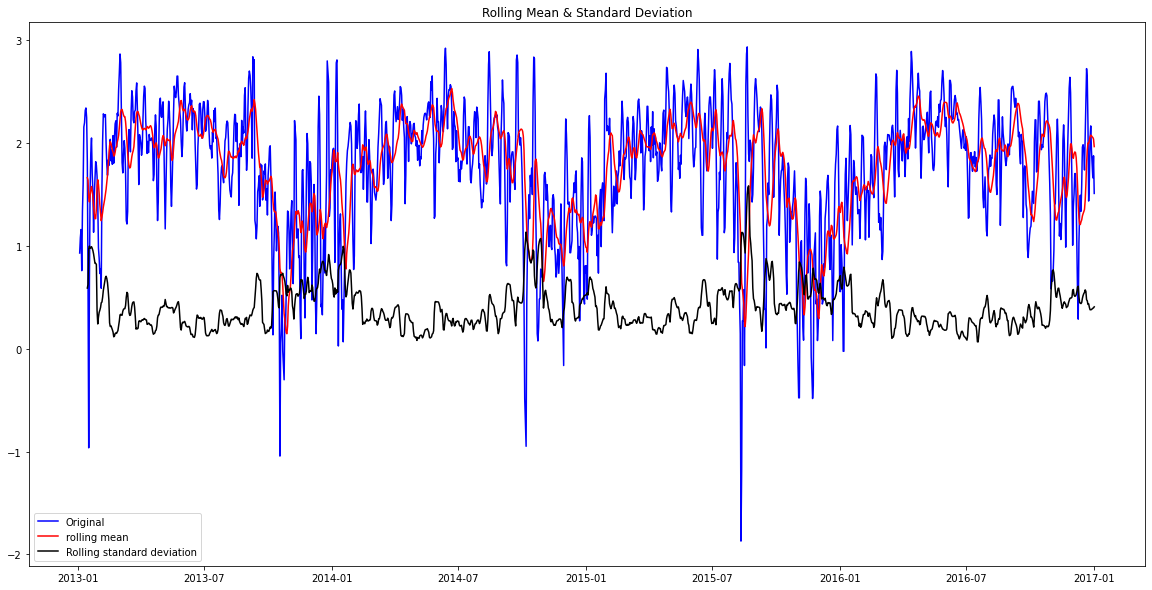

Results of Dickey-Fuller Test:
Test Statistic                   -3.971481
p-value                           0.001567
#Lags Used                       21.000000
Number of Observations Used    1436.000000
Critical value (1%)              -3.434912
Critical value (5%)              -2.863555
Critical value (10%)             -2.567843
dtype: float64


In [316]:
df_log = np.log(rolling_mean).replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()
test_stationarity(df_log["wind_speed"])

In [323]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels as sm
import statsmodels.api as sm
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

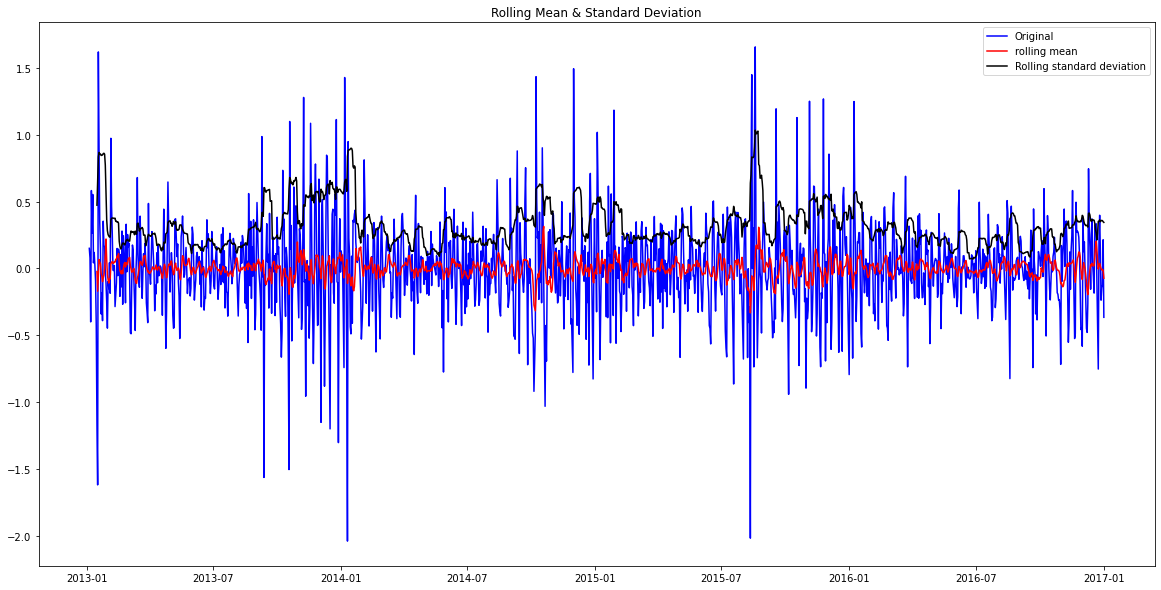

Results of Dickey-Fuller Test:
Test Statistic                -1.388152e+01
p-value                        6.198621e-26
#Lags Used                     2.000000e+01
Number of Observations Used    1.436000e+03
Critical value (1%)           -3.434912e+00
Critical value (5%)           -2.863555e+00
Critical value (10%)          -2.567843e+00
dtype: float64


In [331]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
test_stationarity(df_log_shift["wind_speed"])

C:\Users\voshc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\voshc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\voshc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


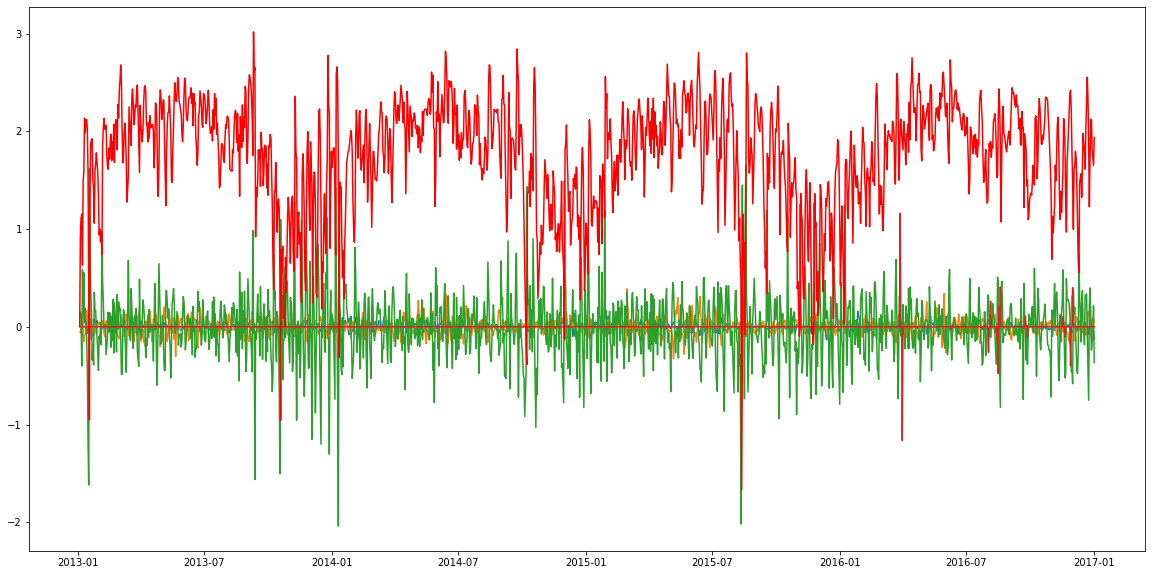

In [390]:
decomposition = sm.tsa.seasonal_decompose(x=df_log.index, model='additive', extrapolate_trend='freq', period=1)

import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(df_log["wind_speed"], order=(2,1,2))
results = model.fit()
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

C:\Users\voshc\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


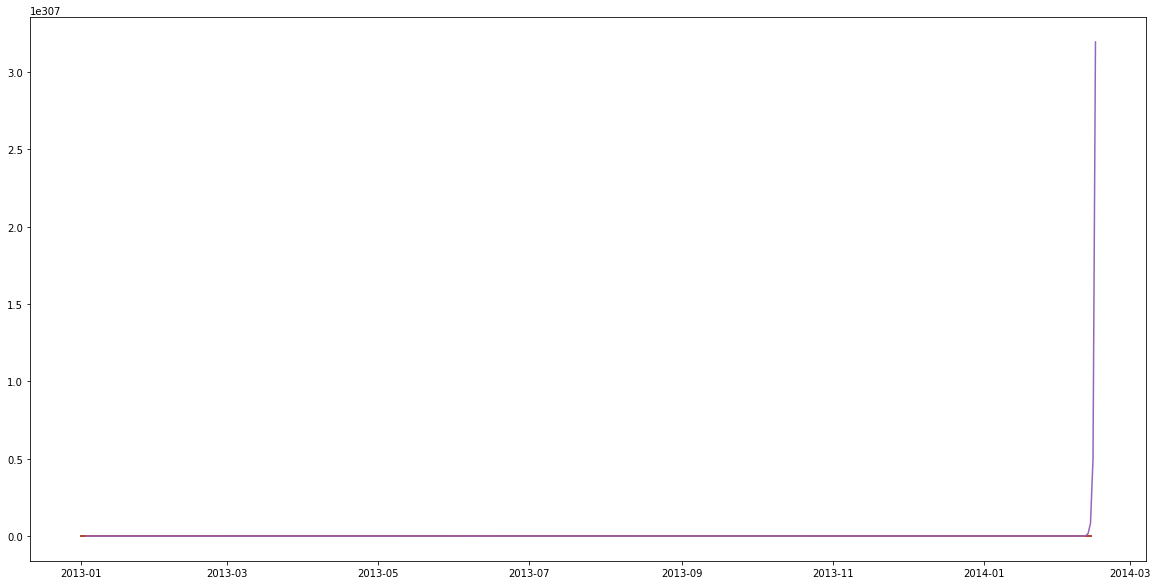

In [386]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['wind_speed'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df.head(409))
plt.plot(predictions_ARIMA.head(409))

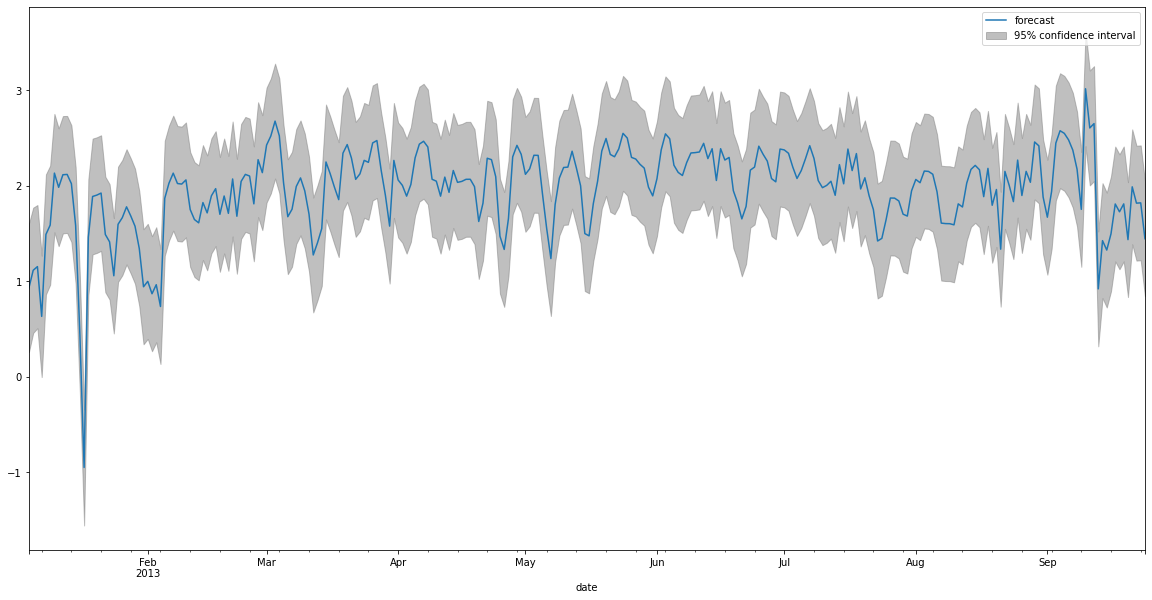

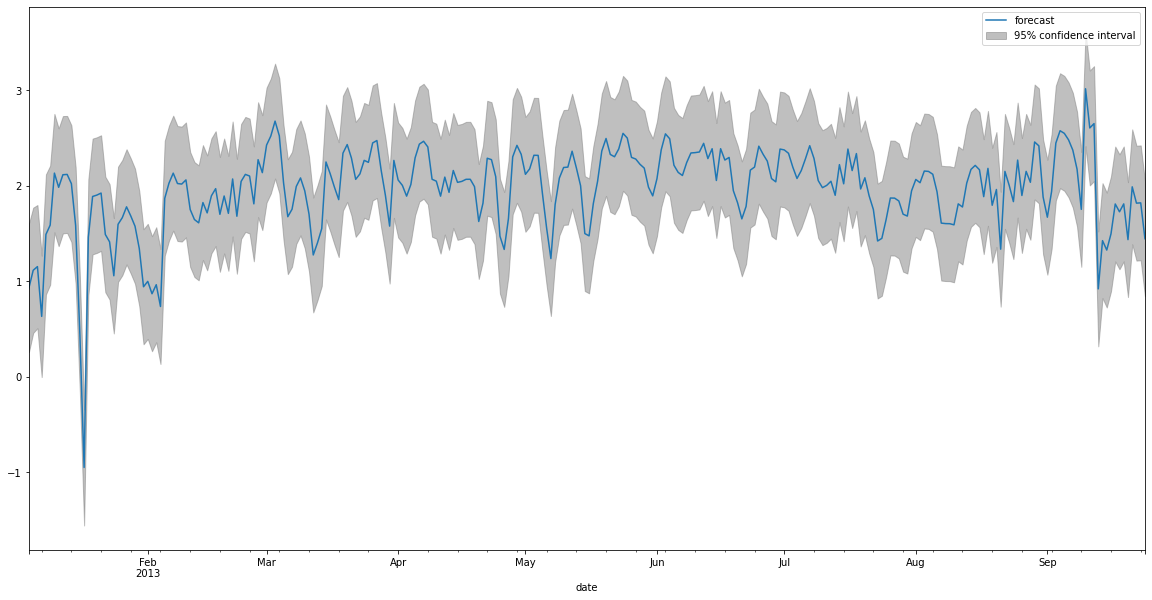

In [392]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(results, 1, 264)